In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime    # To access datetime
from pandas import Series        # To work on series
%matplotlib inline
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

In [2]:
sales = pd.read_csv('C:\\Users\\HP\\Desktop\\PHD Hackathon\\Data Science\\PHD_Reshaped_Data\\train_data.csv')
sales.head()

,Year,Month,MenClothing_Sales,OtherClothing_Sales,WomenClothing_Sales,Sales(In ThousandDollars)
0,2009,1,524.0,936.0,1755.0,6430.0
1,2009,2,496.0,859.0,1729.0,6168.0
2,2009,3,542.0,921.0,2256.0,7438.0
3,2009,4,669.0,914.0,2662.0,8490.0
4,2009,5,650.0,989.0,2732.0,8742.0


### Create Date Column

In [3]:
sales['YearMonth'] = sales['Year'].map(str)+'-'+sales['Month'].map(str)
sales['YearMonth'] = pd.to_datetime(sales.YearMonth, format = '%Y-%m')

In [4]:
sales.head()

,Year,Month,MenClothing_Sales,OtherClothing_Sales,WomenClothing_Sales,Sales(In ThousandDollars),YearMonth
0,2009,1,524.0,936.0,1755.0,6430.0,2009-01-01
1,2009,2,496.0,859.0,1729.0,6168.0,2009-02-01
2,2009,3,542.0,921.0,2256.0,7438.0,2009-03-01
3,2009,4,669.0,914.0,2662.0,8490.0,2009-04-01
4,2009,5,650.0,989.0,2732.0,8742.0,2009-05-01


In [5]:
sales.isnull().sum()

Year                         0
Month                        0
MenClothing_Sales            4
OtherClothing_Sales          5
WomenClothing_Sales          4
Sales(In ThousandDollars)    0
YearMonth                    0
dtype: int64

### Filling Missing Values

In [6]:
sales['MenClothing_Sales']  = sales['MenClothing_Sales'].fillna(sales['MenClothing_Sales'].mean())
sales['OtherClothing_Sales']  = sales['OtherClothing_Sales'].fillna(sales['OtherClothing_Sales'].mean())
sales['WomenClothing_Sales']  = sales['WomenClothing_Sales'].fillna(sales['WomenClothing_Sales'].mean())
sales.isnull().sum()

Year                         0
Month                        0
MenClothing_Sales            0
OtherClothing_Sales          0
WomenClothing_Sales          0
Sales(In ThousandDollars)    0
YearMonth                    0
dtype: int64

### Seperating MenClothing_Sales, OtherClothing_Sales, WomenClothing_Sales

In [7]:
men_clothing_sales = sales.copy().drop(['OtherClothing_Sales', 'WomenClothing_Sales', 'Sales(In ThousandDollars)'], axis=1)
women_clothing_sales = sales.copy().drop(['OtherClothing_Sales', 'Sales(In ThousandDollars)', 'MenClothing_Sales'], axis=1)
other_clothing_sales = sales.copy().drop(['WomenClothing_Sales', 'Sales(In ThousandDollars)', 'MenClothing_Sales'], axis=1)

men_clothing_sales.head(), women_clothing_sales.head(), other_clothing_sales.head()

(   Year  Month  MenClothing_Sales  YearMonth
 0  2009      1              524.0 2009-01-01
 1  2009      2              496.0 2009-02-01
 2  2009      3              542.0 2009-03-01
 3  2009      4              669.0 2009-04-01
 4  2009      5              650.0 2009-05-01,
    Year  Month  WomenClothing_Sales  YearMonth
 0  2009      1               1755.0 2009-01-01
 1  2009      2               1729.0 2009-02-01
 2  2009      3               2256.0 2009-03-01
 3  2009      4               2662.0 2009-04-01
 4  2009      5               2732.0 2009-05-01,
    Year  Month  OtherClothing_Sales  YearMonth
 0  2009      1                936.0 2009-01-01
 1  2009      2                859.0 2009-02-01
 2  2009      3                921.0 2009-03-01
 3  2009      4                914.0 2009-04-01
 4  2009      5                989.0 2009-05-01)

In [8]:
type(men_clothing_sales), type(women_clothing_sales), type(other_clothing_sales)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

In [9]:
men_clothing_sales.isnull().sum(), women_clothing_sales.isnull().sum(), other_clothing_sales.isnull().sum()

(Year                 0
 Month                0
 MenClothing_Sales    0
 YearMonth            0
 dtype: int64, Year                   0
 Month                  0
 WomenClothing_Sales    0
 YearMonth              0
 dtype: int64, Year                   0
 Month                  0
 OtherClothing_Sales    0
 YearMonth              0
 dtype: int64)

### set YearMonth as Index

In [10]:
def set_index_YearMonth(df):
    df_index = pd.DataFrame(df.set_index('YearMonth'))
    return pd.DataFrame(df_index)

In [11]:
women_clothing_sales = set_index_YearMonth(women_clothing_sales)
men_clothing_sales = set_index_YearMonth(men_clothing_sales)
other_clothing_sales = set_index_YearMonth(other_clothing_sales)

In [12]:
type(men_clothing_sales), type(women_clothing_sales), type(other_clothing_sales)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

In [13]:
men_clothing_sales.head(), women_clothing_sales.head(), other_clothing_sales.head()

(            Year  Month  MenClothing_Sales
 YearMonth                                 
 2009-01-01  2009      1              524.0
 2009-02-01  2009      2              496.0
 2009-03-01  2009      3              542.0
 2009-04-01  2009      4              669.0
 2009-05-01  2009      5              650.0,
             Year  Month  WomenClothing_Sales
 YearMonth                                   
 2009-01-01  2009      1               1755.0
 2009-02-01  2009      2               1729.0
 2009-03-01  2009      3               2256.0
 2009-04-01  2009      4               2662.0
 2009-05-01  2009      5               2732.0,
             Year  Month  OtherClothing_Sales
 YearMonth                                   
 2009-01-01  2009      1                936.0
 2009-02-01  2009      2                859.0
 2009-03-01  2009      3                921.0
 2009-04-01  2009      4                914.0
 2009-05-01  2009      5                989.0)

### Yearly Mean Sales

In [14]:
def yearly_mean_sales(df, var):
    temp1 = df.groupby(['Year'])[var].mean()
    temp1.plot(figsize=(15,5), title= 'Yearwise Mean Sales_'+var, fontsize=14)

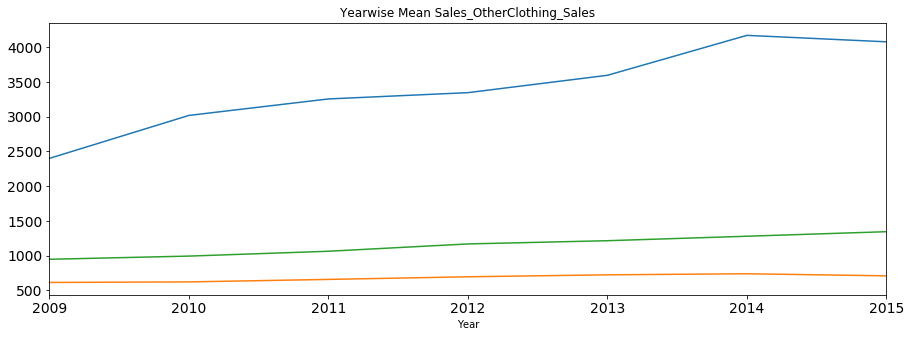

In [15]:
yearly_mean_sales(women_clothing_sales, 'WomenClothing_Sales')
yearly_mean_sales(men_clothing_sales, 'MenClothing_Sales')
yearly_mean_sales(other_clothing_sales, 'OtherClothing_Sales')

### Monthly Mean Sales

In [16]:
def monthly_mean_sales(df, var):
    temp1 = df.groupby(['Year', 'Month'])[var].mean()
    temp1.plot(figsize=(15,5), title= 'Monthwise Mean Sales_'+var, fontsize=14)

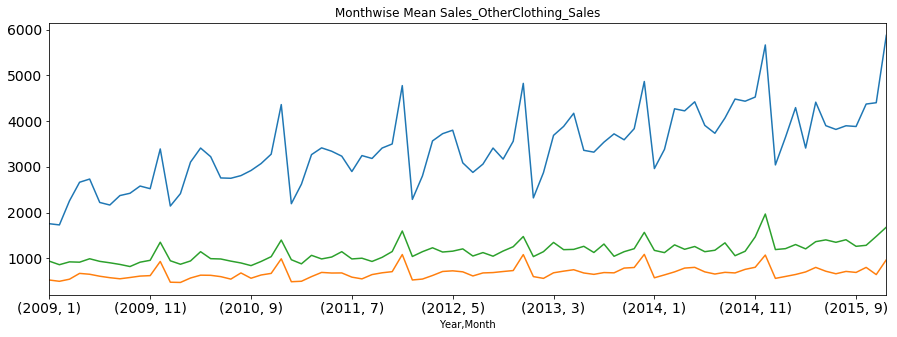

In [17]:
monthly_mean_sales(women_clothing_sales, 'WomenClothing_Sales')
monthly_mean_sales(men_clothing_sales, 'MenClothing_Sales')
monthly_mean_sales(other_clothing_sales, 'OtherClothing_Sales')

Month
1     AxesSubplot(0.125,0.125;0.775x0.755)
2     AxesSubplot(0.125,0.125;0.775x0.755)
3     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
5     AxesSubplot(0.125,0.125;0.775x0.755)
6     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
9     AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
11    AxesSubplot(0.125,0.125;0.775x0.755)
12    AxesSubplot(0.125,0.125;0.775x0.755)
Name: WomenClothing_Sales, dtype: object

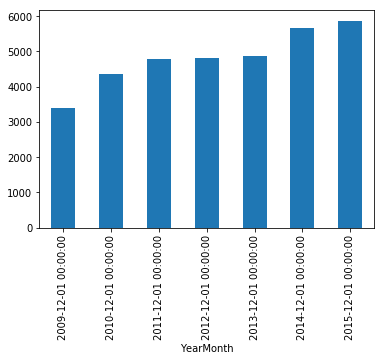

In [18]:
women_clothing_sales.groupby('Month')['WomenClothing_Sales'].plot.bar()


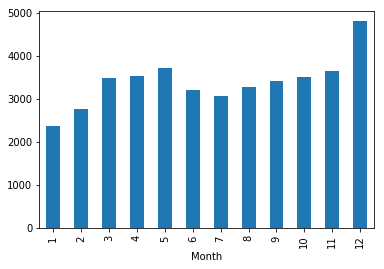

In [19]:
women_clothing_sales.groupby('Month')['WomenClothing_Sales'].mean().plot.bar()


### Train Test Split

In [20]:
def split_data_train(df):
    df1 = df.ix['2009-01-01':'2014-12-01']
    return pd.DataFrame(df1)

def split_data_validation(df):
    df2 = df.ix['2015-01-01':'2015-12-01']
    return pd.DataFrame(df2)

In [21]:
# Train Data

women_clothing_train = split_data_train(women_clothing_sales)
men_clothing_train = split_data_train(men_clothing_sales)
other_clothing_train = split_data_train(other_clothing_sales)

In [22]:
type(women_clothing_train), type(men_clothing_train), type(other_clothing_train)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

In [23]:
women_clothing_train.shape, men_clothing_train.shape, other_clothing_train.shape

((72, 3), (72, 3), (72, 3))

In [24]:
men_clothing_train.head(7)

,Year,Month,MenClothing_Sales
YearMonth,,,
2009-01-01,2009,1,524.0
2009-02-01,2009,2,496.0
2009-03-01,2009,3,542.0
2009-04-01,2009,4,669.0
2009-05-01,2009,5,650.0
2009-06-01,2009,6,607.0
2009-07-01,2009,7,575.0


In [25]:
# validation Data

women_clothing_valid = split_data_validation(women_clothing_sales)
men_clothing_valid = split_data_validation(men_clothing_sales)
other_clothing_valid = split_data_validation(other_clothing_sales)

In [26]:
women_clothing_valid.shape, men_clothing_valid.shape, other_clothing_valid.shape  

((12, 3), (12, 3), (12, 3))

In [34]:
women_clothing_valid.head()

,Year,Month,WomenClothing_Sales
YearMonth,,,
2015-01-01,2015,1,3041.0000
2015-02-01,2015,2,3646.0000
2015-03-01,2015,3,4294.0000
2015-04-01,2015,4,3409.8125
2015-05-01,2015,5,4413.0000


### Reset Index

In [35]:
women_clothing_train = women_clothing_train.reset_index()
men_clothing_train = men_clothing_train.reset_index()
other_clothing_train = other_clothing_train.reset_index()

women_clothing_valid = women_clothing_valid.reset_index()
men_clothing_valid = men_clothing_valid.reset_index()
other_clothing_valid = other_clothing_valid.reset_index()

In [46]:
# women_clothing_train['WomenClothing_Sales'] = women_clothing_train['WomenClothing_Sales'].astype('int64')
# women_clothing_train.dtypes

YearMonth              datetime64[ns]
Year                            int64
Month                           int64
WomenClothing_Sales             int64
dtype: object

### Model Building

In [47]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    # Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=24) 
    rolstd = pd.rolling_std(timeseries, window=24)
    
    # Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [48]:
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 20,10

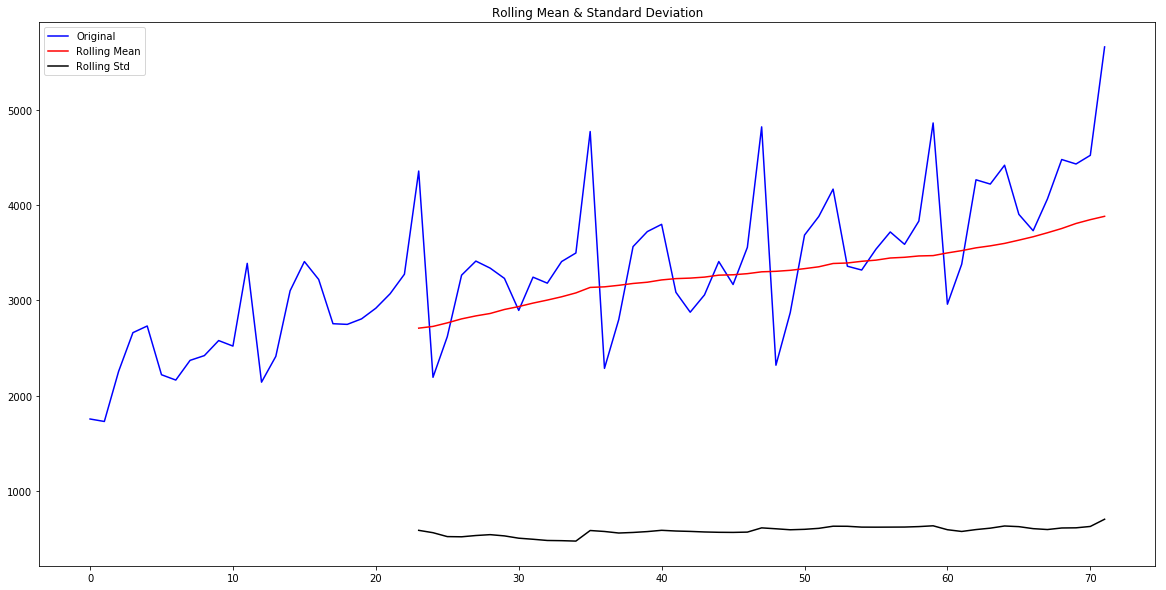

Results of Dickey-Fuller Test:
Test Statistic                  0.334810
p-value                         0.978886
#Lags Used                     12.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


In [49]:
test_stationarity(women_clothing_train['WomenClothing_Sales'])

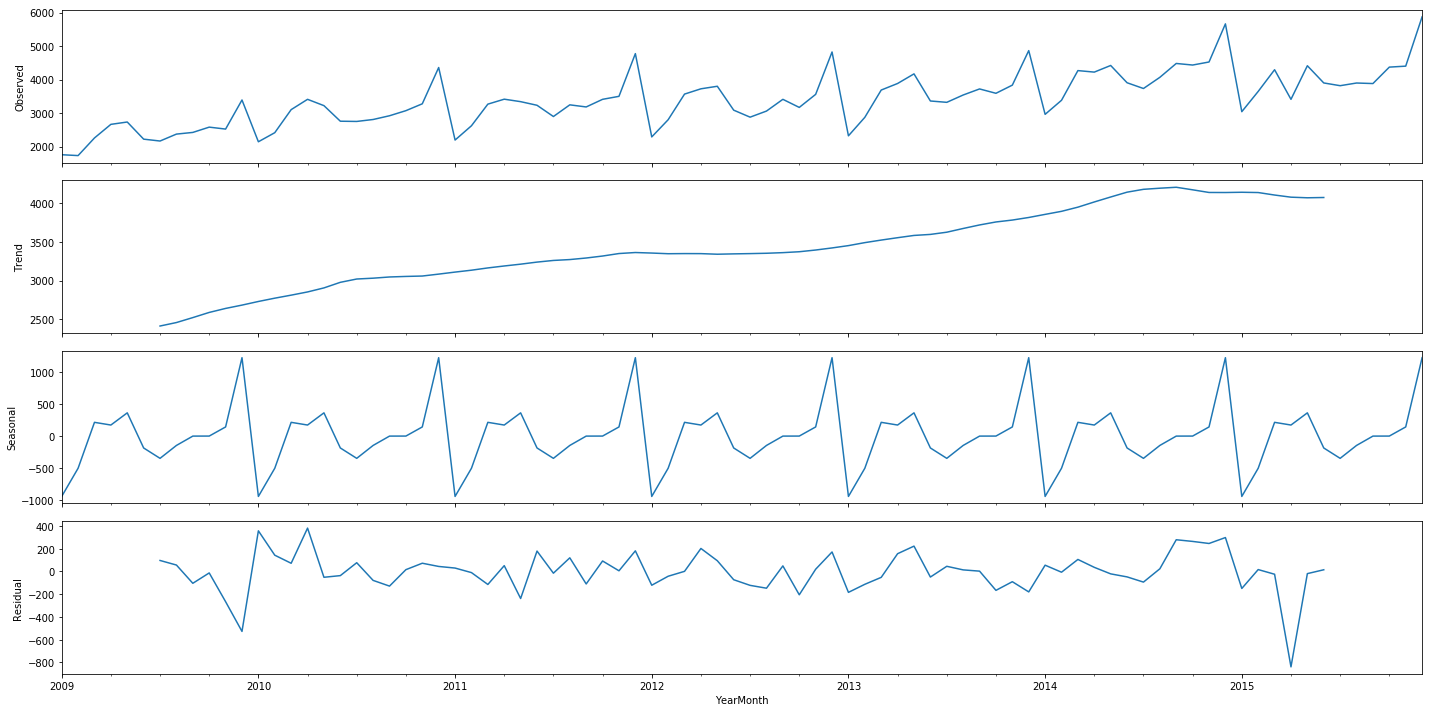

In [59]:
res = sm.tsa.seasonal_decompose(women_clothing_sales.WomenClothing_Sales, freq=12)
fig = res.plot()

In [42]:
from pyramid.arima import auto_arima

In [77]:
model_series = auto_arima(women_clothing_train['WomenClothing_Sales'], start_p=1, start_q=1,max_p=3, max_q=3, 
                          m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore', suppress_warnings=True)

model_series.fit(women_clothing_train['WomenClothing_Sales'])

forecast = model_series.predict(n_periods=12)
forecast = pd.DataFrame(forecast, index = women_clothing_valid.index, columns=['Sales(In ThousandDollars)2015'])

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=809.103, BIC=819.490, Fit time=1.016 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=820.838, BIC=824.993, Fit time=0.026 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=811.813, BIC=820.123, Fit time=0.244 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=807.129, BIC=815.439, Fit time=0.751 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=806.993, BIC=817.381, Fit time=1.403 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=807.184, BIC=815.495, Fit time=0.610 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=805.398, BIC=811.630, Fit time=0.285 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=807.362, BIC=815.672, Fit time=0.359 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 0, 12);

In [65]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [79]:
mean_absolute_percentage_error(women_clothing_valid['WomenClothing_Sales'], forecast['Sales(In ThousandDollars)2015'])

21.483827132129406

### Training On Complete Sales And Predicting 2016 Sales

In [80]:
model_series = auto_arima(women_clothing_sales['WomenClothing_Sales'], start_p=1, start_q=1,max_p=3, max_q=3, 
                          m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)

model_series.fit(women_clothing_sales['WomenClothing_Sales'])

forecast_2016 = model_series.predict(n_periods=12)
forecast_2016 = pd.DataFrame(forecast_2016, index = women_clothing_valid.index, columns=['Sales(In ThousandDollars)2016'])

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1001.150, BIC=1012.464, Fit time=1.282 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1013.130, BIC=1017.655, Fit time=0.039 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1003.642, BIC=1012.693, Fit time=0.588 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=999.489, BIC=1008.540, Fit time=0.817 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1000.447, BIC=1011.761, Fit time=1.369 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=998.252, BIC=1005.040, Fit time=0.285 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=999.931, BIC=1008.982, Fit time=0.452 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 0, 12); AIC=1000.063, BIC=1009.114, Fit time=0.374 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 0, 12); AIC=1000.928, BIC=1012.241, Fit time=0.549 seconds
Fit ARIMA: order=(0, 1, 1) seas

In [81]:
total_forecast = pd.concat([forecast, forecast_2016], axis=1)
total_forecast

,Sales(In ThousandDollars)2015,Sales(In ThousandDollars)2016
0,3698.753468,3022.266143
1,4120.972779,3618.316093
2,5010.192090,4257.366043
3,4967.411402,3364.228493
4,5167.630713,4358.465944
5,4653.850024,3835.515894
6,4484.069335,3744.565844
7,4820.288646,3815.615794
8,5236.507957,3790.665744
9,5191.727269,4272.715694


In [ ]:
####################################################################################################

### Holt-Winters

In [60]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt


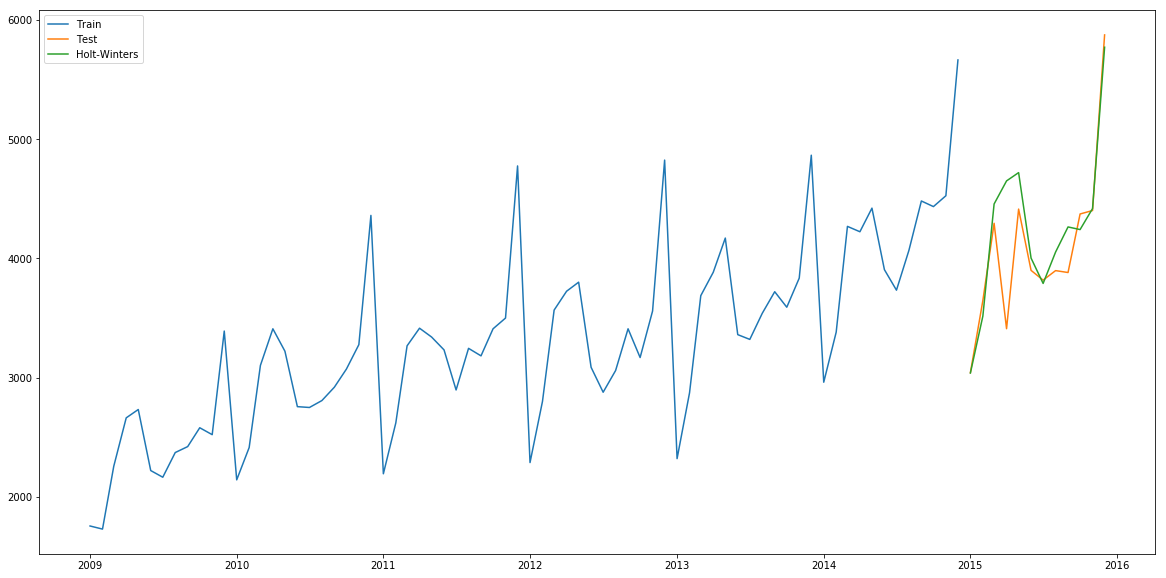

In [128]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


train, test = women_clothing_train.iloc[:, -1], women_clothing_valid.iloc[:, -1]
model = ExponentialSmoothing(train, seasonal='mul', seasonal_periods=12).fit()
pred = model.predict(start=test.index[0], end=test.index[-1])


plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best')

In [82]:
pred

0     1656.709644
1     1987.101394
2     2316.426329
3     2378.092976
4     2591.949402
5     2271.644467
6     2120.783067
7     2296.605009
8     2464.506262
9     2424.937510
10    2624.858238
11    3345.118889
dtype: float64

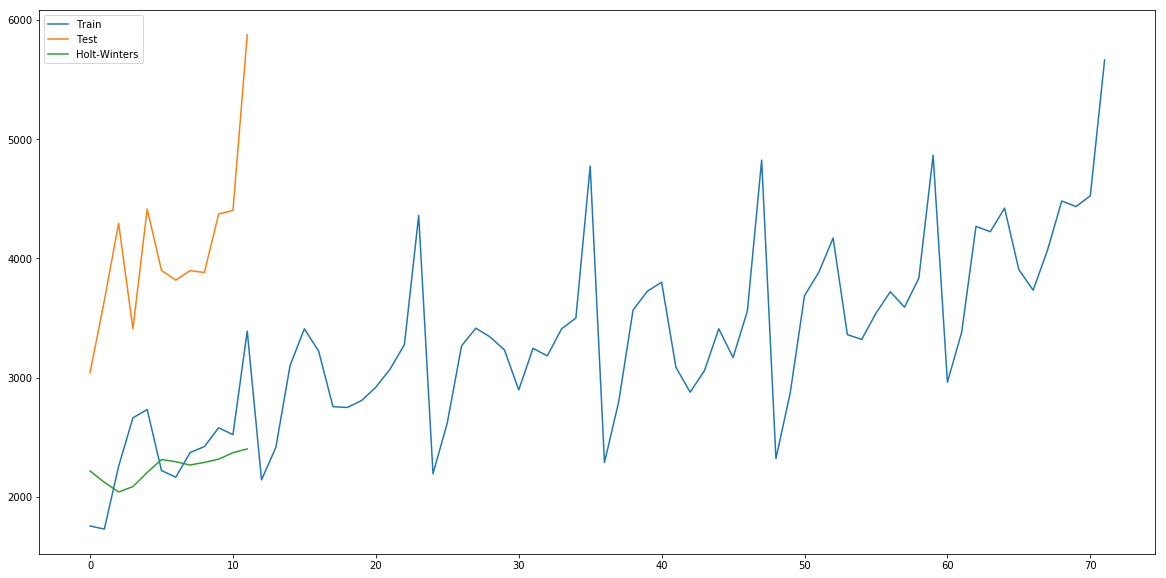

In [84]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


train, test = women_clothing_train.iloc[:, -1], women_clothing_valid.iloc[:, -1]
model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=12).fit()
pred = model.predict(start=test.index[0], end=test.index[-1])


plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best')

In [ ]:
########################################################

### Forecast for 2016 using records from 2009 - 2015  ( Auto_ARIMA )

In [101]:
women_clothing_valid = women_clothing_valid.set_index('YearMonth')
women_clothing_valid

,Year,Month,WomenClothing_Sales
YearMonth,,,
2015-01-01,2015,1,3041.0000
2015-02-01,2015,2,3646.0000
2015-03-01,2015,3,4294.0000
2015-04-01,2015,4,3409.8125
2015-05-01,2015,5,4413.0000
2015-06-01,2015,6,3899.0000
2015-07-01,2015,7,3817.0000
2015-08-01,2015,8,3897.0000
2015-09-01,2015,9,3881.0000


In [102]:
def forecast_category_sales(train_set, var):
        
        model_series = auto_arima(train_set, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, 
                                  seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
        
        model_series.fit(train_set)

        forecast = model_series.predict(n_periods=12)
        forecast = pd.DataFrame(forecast, columns=['Sales(In ThousandDollars)_'+var], index=women_clothing_valid.index)
        return forecast

In [103]:
# training_women = y_train_women.append(y_val_women)
# training_men = y_train_men.append(y_val_men)
# training_other = y_train_other.append(y_val_other)

forecast_women = forecast_category_sales(women_clothing_sales['WomenClothing_Sales'], 'WomenClothing')
forecast_men = forecast_category_sales(men_clothing_sales['MenClothing_Sales'], 'MenClothing')
forecast_others = forecast_category_sales(other_clothing_sales['OtherClothing_Sales'], 'OtherClothing')

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1001.150, BIC=1012.464, Fit time=0.840 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1013.130, BIC=1017.655, Fit time=0.021 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1003.642, BIC=1012.693, Fit time=0.312 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=999.489, BIC=1008.540, Fit time=0.532 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1000.447, BIC=1011.761, Fit time=0.966 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=998.252, BIC=1005.040, Fit time=0.194 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=999.931, BIC=1008.982, Fit time=0.291 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 0, 12); AIC=1000.063, BIC=1009.114, Fit time=0.239 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 0, 12); AIC=1000.928, BIC=1012.241, Fit time=0.379 seconds
Fit ARIMA: order=(0, 1, 1) seas

In [114]:
all_cat_forecast = pd.concat([forecast_women, forecast_men, forecast_others], axis=1)
all_cat_forecast.reset_index()

,YearMonth,Sales(In ThousandDollars)_WomenClothing,Sales(In ThousandDollars)_MenClothing,Sales(In ThousandDollars)_OtherClothing
0,2015-01-01,3022.266143,536.258684,1244.977214
1,2015-02-01,3618.316093,551.253171,1343.420477
2,2015-03-01,4257.366043,624.775983,1404.243246
3,2015-04-01,3364.228493,695.444134,1381.243046
4,2015-05-01,4358.465944,723.835081,1401.401636
5,2015-06-01,3835.515894,662.624344,1437.663853
6,2015-07-01,3744.565844,604.888848,1350.116215
7,2015-08-01,3815.615794,643.175081,1445.536766
8,2015-09-01,3790.665744,635.056910,1273.220484
9,2015-10-01,4272.715694,707.112232,1360.390599


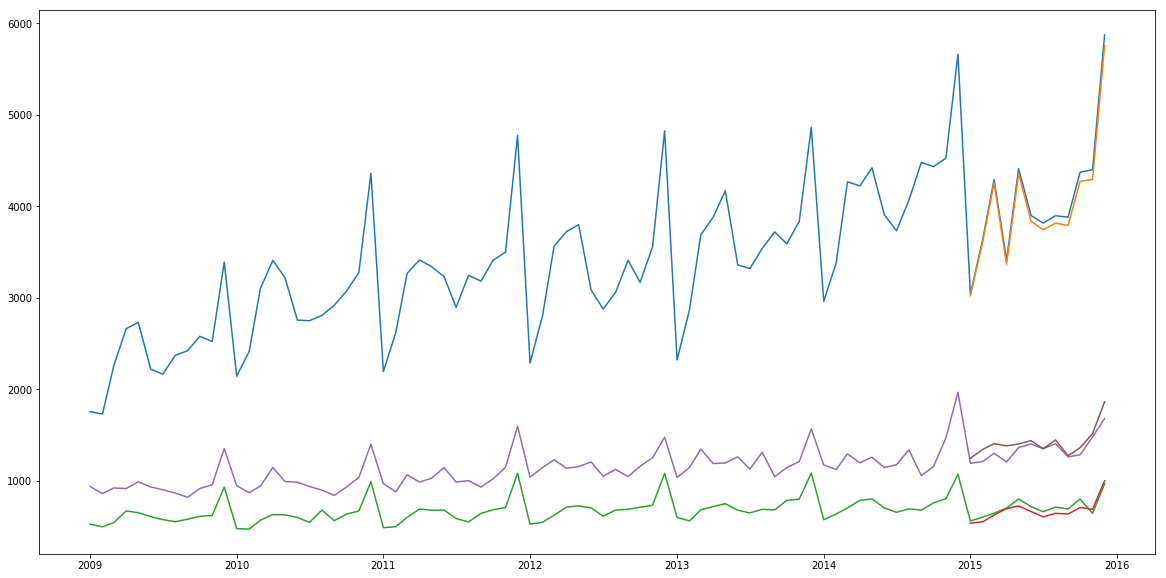

In [115]:
plt.plot(women_clothing_sales['WomenClothing_Sales'])
#plt.plot(valid['Close'])
plt.plot(forecast_women['Sales(In ThousandDollars)_WomenClothing'])

plt.plot(men_clothing_sales['MenClothing_Sales'])
plt.plot(forecast_men['Sales(In ThousandDollars)_MenClothing'])

plt.plot(other_clothing_sales['OtherClothing_Sales'])
plt.plot(forecast_others['Sales(In ThousandDollars)_OtherClothing'])

### Auto ARIMA using 2015 as validation

In [121]:
pred_2015_women = forecast_category_sales(women_clothing_train['WomenClothing_Sales'], 'WomenClothing')
pred_2015_men = forecast_category_sales(men_clothing_train['MenClothing_Sales'], 'MenClothing')
pred_2015_others = forecast_category_sales(other_clothing_train['OtherClothing_Sales'], 'OtherClothing')

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=809.103, BIC=819.490, Fit time=1.129 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=820.838, BIC=824.993, Fit time=0.024 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=811.813, BIC=820.123, Fit time=0.221 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=807.129, BIC=815.439, Fit time=0.726 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=806.993, BIC=817.381, Fit time=1.314 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=807.184, BIC=815.495, Fit time=0.591 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=805.398, BIC=811.630, Fit time=0.268 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=807.362, BIC=815.672, Fit time=0.369 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 0, 12);

In [123]:
women_clothing_train = women_clothing_train.set_index('YearMonth')

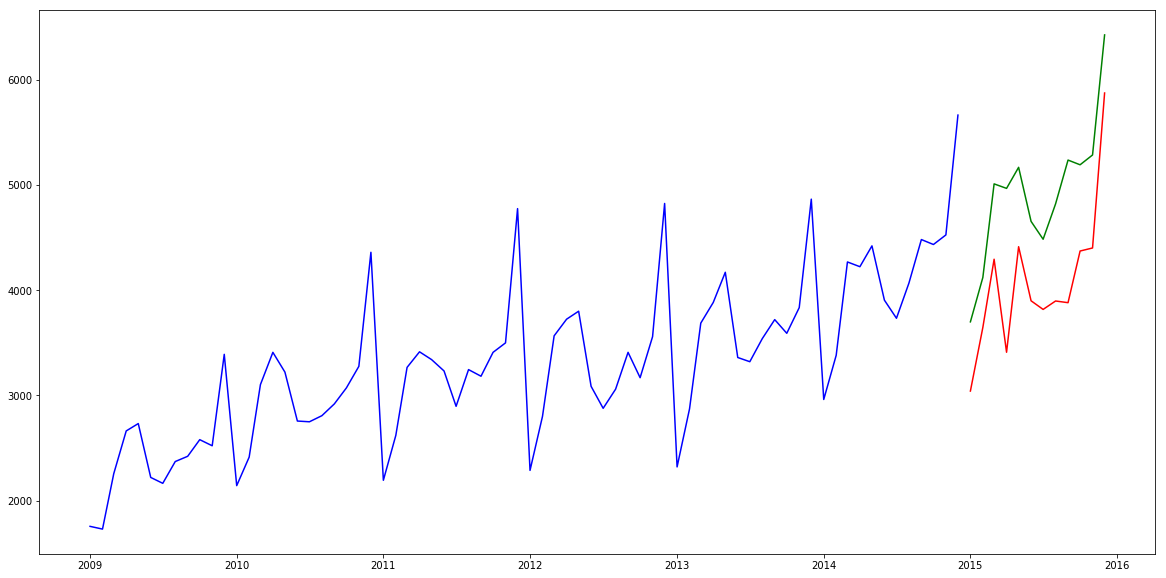

In [125]:
plt.plot(women_clothing_train['WomenClothing_Sales'], color = 'blue')
plt.plot(women_clothing_valid['WomenClothing_Sales'], color='red')
plt.plot(pred_2015_women['Sales(In ThousandDollars)_WomenClothing'], color='green')

In [129]:
mean_absolute_percentage_error(women_clothing_valid['WomenClothing_Sales'], pred_2015_women['Sales(In ThousandDollars)_WomenClothing'])

21.483827132129406